<a href="https://colab.research.google.com/github/cloudsen12/examples/blob/master/example02.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<br>

<a href="https://github.com/cloudsen12/examples/blob/main/example02.ipynb"><img align="left" src="https://img.shields.io/badge/github-%23121011.svg?style=for-the-badge&logo=github&logoColor=white"></a>


<br><br>

<!--COURSE_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://cloudsen12.github.io/thumbnails/cloudsen12.gif" width=10% >


>>>> *This notebook is part of the paper [CloudSEN12 - a global dataset for semantic understanding of cloud and cloud shadow in Sentinel-2](https://cloudsen12.github.io/); the content is available [on GitHub](https://github.com/cloudsen12)* and released under the [MIT](https://opensource.org/licenses/MIT) license. 

<br>

- See our paper [here](https://www.nature.com/articles/s41597-022-01878-2).

- See cloudSEN12 website [here](https://cloudsen12.github.io/).

- See cloudSEN12 in Science Data Bank [here](https://www.scidb.cn/en/detail?dataSetId=f72d622ff4ea4fa18070456a98222b1a).

- See cloudSEN12 in Google Drive [here](https://drive.google.com/drive/folders/1H_Qxy1yX6moqFbKc3Ajn4FFrHlDhYuz3).

- See cloudSEN12 in GitHub [here](https://github.com/cloudsen12).

- See cloudSEN12 in Google Earth Engine [here](https://samapriya.github.io/awesome-gee-community-datasets/projects/cloudsen12/).

- See CloudApp [here](https://csaybar.users.earthengine.app/view/cloudapp).

The CloudSEN12 dataset and the pre-trained models are released under a [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) licence. For using the models in comercial pipelines written consent by the authors must be provided.

In [ ]:
!pip install albumentations --upgrade
!pip install --upgrade opencv-python
!pip install --upgrade opencv-contrib-python
!pip install --upgrade opencv-python-headless
!pip install rasterio --upgrade
!pip install segmentation_models_pytorch --upgrade
!pip install pytorch-lightning
!pip install wandb
!pip install torchmetrics --upgrade

### **2. From Drive to the local computer**

Link: **https://drive.google.com/drive/u/0/folders/1H_Qxy1yX6moqFbKc3Ajn4FFrHlDhYuz3**

![](https://user-images.githubusercontent.com/16768318/192451226-a267eacd-4440-46fc-887e-f475b8893c33.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **3. Load cloudSEN12**

In [ ]:
import pandas as pd

# load the dataset
dataset_metadata = pd.read_csv("/content/drive/MyDrive/version01/cloudsen12_metadata.csv")
dataset_metadata_high = dataset_metadata[dataset_metadata["label_type"] == "high"]
dataset_metadata_high

,annotator_name,roi_id,s2_id_gee,s2_id,s2_date,s2_sen2cor_version,s2_fmask_version,s2_cloudless_version,s2_reflectance_conversion_correction,s2_aot_retrieval_accuracy,...,label_type,cloud_coverage,test,difficulty,proj_epsg,proj_geometry,proj_shape,proj_centroid,proj_transform,test_sr
0,JHOMIRA,ROI_0001,20190212T142031_20190212T143214_T19FDF,S2A_MSIL1C_20190212T142031_N0207_R010_T19FDF_2...,2019-02-12T14:36:26Z,N02.11,4.3.0,1.5.0,1.027712,0,...,high,low-cloudy,2,4.0,32719,"POLYGON ((440030 4568820, 445120 4568820, 4451...",509,POINT (-69.78524 -49.00794),"10, 0, 440030, 0, -10, 4573910",2.0
1,JHOMIRA,ROI_0001,20190304T142031_20190304T142654_T19FDF,S2A_MSIL1C_20190304T142031_N0207_R010_T19FDF_2...,2019-03-04T14:36:24Z,N02.11,4.3.0,1.5.0,1.019235,0,...,high,almost-clear,2,3.0,32719,"POLYGON ((440030 4568820, 445120 4568820, 4451...",509,POINT (-69.78524 -49.00794),"10, 0, 440030, 0, -10, 4573910",2.0
2,JHOMIRA,ROI_0001,20190316T141049_20190316T142437_T19FDF,S2B_MSIL1C_20190316T141049_N0207_R110_T19FDF_2...,2019-03-16T14:26:31Z,N02.11,4.3.0,1.5.0,1.013040,0,...,high,mid-cloudy,2,2.0,32719,"POLYGON ((440030 4568820, 445120 4568820, 4451...",509,POINT (-69.78524 -49.00794),"10, 0, 440030, 0, -10, 4573910",2.0
3,JHOMIRA,ROI_0001,20190525T141059_20190525T142053_T19FDF,S2B_MSIL1C_20190525T141059_N0207_R110_T19FDF_2...,2019-05-25T14:26:41Z,N02.12,4.3.0,1.5.0,0.976248,0,...,high,cloudy,2,2.0,32719,"POLYGON ((440030 4568820, 445120 4568820, 4451...",509,POINT (-69.78524 -49.00794),"10, 0, 440030, 0, -10, 4573910",2.0
4,JHOMIRA,ROI_0001,20200308T141731_20200308T143551_T19FDF,S2A_MSIL1C_20200308T141731_N0209_R010_T19FDF_2...,2020-03-08T14:36:26Z,N02.14,4.3.0,1.5.0,1.016887,0,...,high,cloud-free,2,1.0,32719,"POLYGON ((440030 4568820, 445120 4568820, 4451...",509,POINT (-69.78524 -49.00794),"10, 0, 440030, 0, -10, 4573910",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NICOLE,ROI_9992,20190422T060641_20190422T061156_T42SWC,S2A_MSIL1C_20190422T060641_N0207_R134_T42SWC_2...,2019-04-22T06:19:48Z,N02.11,4.3.0,1.5.0,0.992274,0,...,high,almost-clear,0,2.0,32642,"POLYGON ((532560 3757490, 537650 3757490, 5376...",509,POINT (69.38005 33.98028),"10, 0, 532560, 0, -10, 3762580",0.0
9996,NICOLE,ROI_9992,20191006T055711_20191006T060525_T42SWC,S2A_MSIL1C_20191006T055711_N0208_R091_T42SWC_2...,2019-10-06T06:09:52Z,N02.13,4.3.0,1.5.0,0.998833,0,...,high,cloudy,0,3.0,32642,"POLYGON ((532560 3757490, 537650 3757490, 5376...",509,POINT (69.38005 33.98028),"10, 0, 532560, 0, -10, 3762580",0.0
9997,NICOLE,ROI_9992,20200228T055759_20200228T060528_T42SWC,S2B_MSIL1C_20200228T055759_N0209_R091_T42SWC_2...,2020-02-28T06:09:47Z,N02.14,4.3.0,1.5.0,1.021443,0,...,high,low-cloudy,0,3.0,32642,"POLYGON ((532560 3757490, 537650 3757490, 5376...",509,POINT (69.38005 33.98028),"10, 0, 532560, 0, -10, 3762580",0.0
9998,NICOLE,ROI_9992,20200322T060629_20200322T061114_T42SWC,S2B_MSIL1C_20200322T060629_N0209_R134_T42SWC_2...,2020-03-22T06:19:43Z,N02.14,4.3.0,1.5.0,1.009533,0,...,high,cloud-free,0,1.0,32642,"POLYGON ((532560 3757490, 537650 3757490, 5376...",509,POINT (69.38005 33.98028),"10, 0, 532560, 0, -10, 3762580",0.0


### **4. Define augmentation**

In [ ]:
import albumentations as A
import albumentations.pytorch

# Non destructive transformations - Dehidral group D4
nodestructive_pipe = A.OneOf([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Transpose(p=0.5)
], p=1)

weak_augmentation = A.Compose([
    #A.PadIfNeeded(min_height=512, min_width=512, p=1, always_apply=True),
    nodestructive_pipe,
    albumentations.pytorch.transforms.ToTensorV2()
])

no_augmentation = A.Compose([
    #A.PadIfNeeded(min_height=512, min_width=512, p=1, always_apply=True),
    albumentations.pytorch.transforms.ToTensorV2()
])

AUGMENTATION=weak_augmentation

### **5. Define the data DataLoader**

In [ ]:
import torch
import numpy as np
import rasterio as rio
import warnings

# Create a DataLoader object.
class SEGDATALOADER(torch.utils.data.DataLoader):
    def __init__(self, X, y, augmentation=False):
        self.X = X
        self.y = y
        self.augmentation = augmentation
    def __len__(self):
        return len(self.X)

    def __getitem__(self, index: int):
        # Augmentation pipeline
        if self.augmentation:
            Ximg = np.array(np.moveaxis(self.X[index].copy(), 0, -1)/10000)
            yimg = np.array(self.y[index].copy()).squeeze()
            Ximg, yimg = AUGMENTATION(image=Ximg, mask=yimg).values()            
            Ximg, yimg = Ximg.type(torch.float32), yimg.type(torch.float32)
        else:
            Ximg = np.array(self.X[index].copy()/10000)
            yimg = np.array(self.y[index].copy()).squeeze()
            Ximg, yimg = Ximg.astype(np.float32), yimg.astype(np.float32)

        # Check semantic_segmentation_pytorch model input shape requirements.                                
        if Ximg.shape[0] > Ximg.shape[2]:
            warnings.warn(
                "segmentation_models.pytorch expects channels first (B, C, H, W)"
            )
        return Ximg, yimg

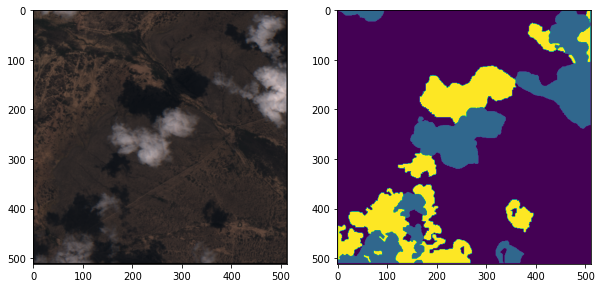

In [ ]:
# Simple check
import matplotlib.pyplot as plt

# Load the numpy file
X = np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_S2_01", dtype='int16', mode='r', shape=(8490, 13, 512, 512))
y = np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_target_01", dtype='int16', mode='r', shape=(8490, 1, 512, 512))

# check dataloader
dataloader = SEGDATALOADER(X, y, augmentation=weak_augmentation)
X, y = dataloader[1127]

# create matplolib subfigure 2x1
fix, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(X.moveaxis(0, 2)[:,:,[3,2,1]])
ax[1].imshow(y)
plt.show()

### **6. Define a model**

In [ ]:
import segmentation_models_pytorch as smp 
SEGMODEL = smp.Unet(
        encoder_name="mobilenet_v2",
        encoder_weights=None,
        classes=4,
        in_channels=13        
)

### **7. Define a loss**

In [ ]:
class CrossEntropyLoss(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input, target):
        # flatten label and prediction tensors
        #input = input.view(-1)
        target = target.type(torch.long)
        BCE = torch.nn.functional.cross_entropy(input, target)
        return BCE
        
CRITERION = CrossEntropyLoss()

### **8. Define metrics**

In [ ]:
import torch
from torchmetrics import Metric
from sklearn.metrics import fbeta_score, recall_score, precision_score

class BF2score(Metric):

    is_differentiable: bool = False
    higher_is_better: bool = True
    full_state_update: bool = False

    def __init__(self, thershold: float = 0.90):
        super().__init__()
        self.add_state("container", default=torch.tensor(0), dist_reduce_fx="sum")        
        self.add_state("total", default=torch.tensor(0), dist_reduce_fx="sum")
        self.thershold = thershold

    def update(self, preds: torch.Tensor, target: torch.Tensor):
        assert preds.shape == target.shape
        score_container = list()
        for index in range(preds.shape[0]):
            score_container.append(fbeta_score(target[index].flatten().detach().cpu(), preds[index].flatten().detach().cpu(), average='macro', beta=2, zero_division=1))
        score_container = torch.Tensor(score_container)
        gt_thershold = score_container.gt(self.thershold)        
        self.container += torch.sum(gt_thershold)
        self.total += preds.shape[0]

    def compute(self):
        return self.container/self.total*100

class BPAscore(Metric):

    is_differentiable: bool = False
    higher_is_better: bool = True
    full_state_update: bool = False

    def __init__(self, thershold: float = 0.90):
        super().__init__()
        self.add_state("container", default=torch.tensor(0), dist_reduce_fx="sum")        
        self.add_state("total", default=torch.tensor(0), dist_reduce_fx="sum")
        self.thershold = thershold

    def update(self, preds: torch.Tensor, target: torch.Tensor):
        assert preds.shape == target.shape
        score_container = list()
        for index in range(preds.shape[0]):
            score_container.append(recall_score(target[index].flatten().detach().cpu(), preds[index].flatten().detach().cpu(), average='macro', zero_division=1))
        score_container = torch.Tensor(score_container)
        gt_thershold = score_container.gt(self.thershold)        
        self.container += torch.sum(gt_thershold)
        self.total += preds.shape[0]

    def compute(self):
        return self.container/self.total*100


class BUAscore(Metric):

    is_differentiable: bool = False
    higher_is_better: bool = True
    full_state_update: bool = False

    def __init__(self, thershold: float = 0.90):
        super().__init__()
        self.add_state("container", default=torch.tensor(0), dist_reduce_fx="sum")        
        self.add_state("total", default=torch.tensor(0), dist_reduce_fx="sum")
        self.thershold = thershold

    def update(self, preds: torch.Tensor, target: torch.Tensor):
        assert preds.shape == target.shape
        score_container = list()
        for index in range(preds.shape[0]):
            score_container.append(precision_score(target[index].flatten().detach().cpu(), preds[index].flatten().detach().cpu(), average='macro', zero_division=1))
        score_container = torch.Tensor(score_container)
        gt_thershold = score_container.gt(self.thershold)        
        self.container += torch.sum(gt_thershold)
        self.total += preds.shape[0]

    def compute(self):
        return self.container/self.total*100

METRICS = {"f2_score": BF2score(), "pa_score": BPAscore(), "ua_score": BUAscore()}

### **9. Define the logger (OPTIONAL)**

In [ ]:
import os
from pytorch_lightning.loggers import WandbLogger
import wandb

#wandb.init(settings=wandb.Settings(start_method='fork'))
os.environ["WANDB_API_KEY"] = "292fd80f458c18b8754662fed761021e4fbebe6d"
LOGGER = WandbLogger(project="cloudseg")

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: csaybar (dtacs). Use `wandb login --relogin` to force relogin


### **10. Create a Pytorch-lighning model**

In [ ]:
from typing import Optional
import pytorch_lightning as pl
import torch

class litSegModel(pl.LightningModule):
    """
    Lightning Class template to wrap segmentation models.
    Args:
      hparams (`DictConfig`) : A `DictConfig` that stores the configs for training .
    """

    def __init__(self):
        super().__init__()
        #self.save_hyperparameters()  # Save the hyperparameters.
        self.model = SEGMODEL
        self.dataloader = SEGDATALOADER
        self.criterion = CRITERION
        self.metrics = METRICS
        self.dataset = {
                    "train": {
                        "X":  np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_S2_01", dtype='int16', mode='r', shape=(8490, 13, 512, 512)),
                        "y": np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_target_01", dtype='int16', mode='r', shape=(8490, 1, 512, 512))
                    }, 
                    "val": {
                        "X":  np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_S2_01", dtype='int16', mode='r', shape=(535, 13, 512, 512)),
                        "y": np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_target_01", dtype='int16', mode='r', shape=(535, 1, 512, 512))                
                    },
                    "test": {
                        "X":  np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_S2_01", dtype='int16', mode='r', shape=(975, 13, 512, 512)),
                        "y": np.memmap("/content/drive/MyDrive/cloudSEN12/demo/high_target_01", dtype='int16', mode='r', shape=(975, 1, 512, 512))
                    }       
                }        
        self.augmentation = AUGMENTATION


    def setup(self, stage: Optional[str] = None) -> None:
        # train/val/test split
        (Xtrain, ytrain) = self.dataset["train"].values()
        (Xval, yval) = self.dataset["val"].values()
        (Xtest, ytest) = self.dataset["test"].values()
        
        if stage in (None, "fit"):          
            self.dbtrain = self.dataloader(Xtrain, ytrain, self.augmentation)
            self.dbval = self.dataloader(Xtrain, ytrain, None)

        if stage in (None, "test"):
            self.dbtest = self.dataloader(Xtest, ytest, None)

    def train_dataloader(self):        
        return torch.utils.data.DataLoader(
            dataset=self.dbtrain,
            batch_size=2,
            num_workers=0,
            pin_memory=False,
            shuffle=True,
        )

    def val_dataloader(self):        
        return torch.utils.data.DataLoader(
            dataset=self.dbval,
            batch_size=2,
            num_workers=0,
            pin_memory=False,
            shuffle=False,
        )

    def test_dataloader(self):        
        return torch.utils.data.DataLoader(
            dataset=self.dbtest,
            batch_size=2,
            num_workers=0,
            pin_memory=False,
            shuffle=False,
        )

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        X, y = batch
        y_hat = self.forward(X)
        # save_breakpoint([y_hat, y])
        loss = self.criterion(y_hat, y)
        self.log("loss_train", loss, prog_bar=True, logger=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        X, y = batch
        y_hat = self.forward(X)
        # save_breakpoint([y_hat, y])
        loss = self.criterion(y_hat, y)
        self.log("loss_val", loss, prog_bar=True, logger=True, on_epoch=True)

        # Update metrics
        if self.metrics is not None:
            y_hat_class = y_hat.argmax(dim=1)
            y = y.type(torch.long)

            # Iterate for each metric
            for value in self.metrics.values():
                value.update(y_hat_class, y)

        return loss

    def validation_epoch_end(self, val_metrics_results):
        if self.metrics is not None:
            for key, value in self.metrics.items():
                metric_value = value.compute()
                logging_name = key.lower() + "_val"
                self.log(
                    name=logging_name,
                    value=metric_value,
                    prog_bar=False,
                    logger=True,
                    on_epoch=True,
                )
                value.reset()

    def test_step(self, batch, batch_idx):
        if self.metrics is not None:
            # Update metrics
            X, y = batch
            y_hat = self.forward(X).squeeze()
            
            y_hat_class = y_hat.argmax(dim=1)
            y = y.type(torch.long)

            # Iterate for each metric
            for value in self.metrics.values():
                value.update(y_hat_class, y)

    def test_epoch_end(self, outputs):
        if self.metrics is not None:
            for key, value in self.metrics.items():
                metric_value = value.compute()
                logging_name = key.lower() + "_test"
                self.log(
                    name=logging_name,
                    value=metric_value,
                    prog_bar=True,
                    logger=True,
                    on_epoch=True,
                )
                value.reset()

    def configure_optimizers(self) -> torch.optim.Optimizer:
        """
        Configures the optimier to use   for training
        
        Returns:
            torch.optim.Optimier: the optimizer for updating the model's parameters
        """
        self.opt = torch.optim.AdamW(self.parameters(), lr=0.001)
        
        # Set a scheduler
        self.sch = {
            "scheduler": torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer=self.opt,
                mode="min",
                factor=0.1,
                patience=4,
                verbose=True
            ),
            "frequency": 1, # 
            "monitor": "loss_val" # quantity to be monitored
        }
        return [self.opt], [self.sch]

### **11. Simple sanity check**

In [ ]:
# check the class
self = litSegModel()
self.setup()
X, y = next(iter(self.test_dataloader()))
print("Checking DataLoader ... [OK]")

# Checking Model
print("Checking Model ...", end="\r")
y_hat = self(X)
print("Checking Model ... [OK]")

# Checking Criterion
print("Checking Criterion ...", end="\r")    
loss = CRITERION(y_hat, y)
print("Checking Criterion ... [OK]")


# Checking Optimizer
print("Checking Optimizer ...", end="\r")
loss.backward()
print("Checking Optimizer ... [OK]")

Checking DataLoader ... [OK]
Checking Model ... [OK]
Checking Criterion ... [OK]
Checking Optimizer ... [OK]


### **12. Setup a Trainer**

In [ ]:
from pytorch_lightning import Trainer
import pytorch_lightning

mymodel = litSegModel()
callbacks = [
    pytorch_lightning.callbacks.EarlyStopping(monitor="loss_val", patience=10, mode="min"),
    pytorch_lightning.callbacks.ModelCheckpoint(monitor="loss_val", dirpath="bestmodel/", filename="ramiel", save_top_k=1, mode="min")
]
trainer = Trainer(gpus=1, max_epochs=50, precision=16, callbacks=callbacks)#, logger=LOGGER)

# start train
trainer.fit(mymodel)

# start test
trainer.test(mymodel)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:446: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit native Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params
-----------------------------------------------
0 | model     | Unet             | 6.6 M 
1 | criterion | CrossE

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]